<a href="https://colab.research.google.com/github/Caneralp242/t-p/blob/main/emiro%C4%9Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
os.chdir("/gdrive/My Drive/emiroğlu")
!ls

burak  burkay  Image.png  logo.png


In [ ]:
data="/gdrive/My Drive/emiroğlu"
category=["burak","burkay"]


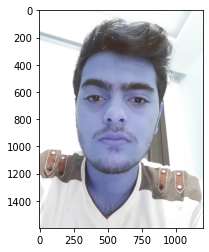

In [ ]:
training_data=[]
def creating_training():
  for i in category:
    path=os.path.join(data,i)
    class_num=category.index(i)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        new_array=cv2.resize(img_array,(50,50))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
creating_training()
    

In [ ]:
for i in category:
  path=os.path.join(data,i)
  class_num=category.index(i)
  for img in os.listdir(path):
    print(img)

XNBJ5535.JPG
BNKU8925.JPG
HCVC6789.JPG
XYID5593.JPG
YFNH9369.JPG
JDSN5074.JPG
YKQF4985.JPG
MXNN2268.JPG
UUNI8390.JPG
CNRY2332.JPG
VIDO8500.JPG
ULIY7565.JPG
BXWY0117.JPG
GYVF7693.JPG
LJCP9267.JPG
HKPS6339.JPG
KBRF9959.JPG
AGTL3865.JPG
CHGK6598.JPG
AUPB5474.JPG
XLZE1130.JPG
NSNK0652.JPG
KNSY1080.JPG
VVHQ5292.JPG
AJIY5027.JPG
MHGO3254.JPG
WHVS5522.JPG
PJYF9752.JPG
KPTT8171.JPG
DIAP1929.JPG
MHTL4148.JPG
LTUH5776.JPG
YKJC0863.JPG
CYSN2776.JPG
EUZP0116.JPG


In [ ]:
import random
random.shuffle(training_data)


In [ ]:
for i in training_data:
  print(i[1])

0
1
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
0
0
0
1
0
1
0


In [ ]:
x=[]
y=[]
for features,labels in training_data:
  x.append(features)
  y.append(labels)

x=np.array(x)
x=np.array(x/255.0)
y=np.array(y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
from keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=x.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x,y,batch_size=100,epochs=10,validation_split=0.1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6288 - accuracy: 0.6452 - val_loss: 0.8911 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 114ms/step - loss: 1.1738 - accuracy: 0.5806 - val_loss: 0.5783 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 105ms/step - loss: 0.6394 - accuracy: 0.6452 - val_loss: 0.5734 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 104ms/step - loss: 0.6652 - accuracy: 0.5161 - val_loss: 0.5405 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 110ms/step - loss: 0.4497 - accuracy: 0.8387 - val_loss: 0.5682 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 112ms/step - loss: 0.4387 - accuracy: 0.6774 - val_loss: 0.5651 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 106ms/step - loss: 0.4505 - accuracy: 0.6774 - val_loss: 0.5055 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=======